# Proyecto Modulo 1

dataset:
https://www.kaggle.com/airbnb/seattle

In [898]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import gmplot
import geopandas as gpd
import shapely
from shapely.geometry import *

import plotly

from plotly.offline import plot, iplot, init_notebook_mode
import plotly.graph_objs as go
init_notebook_mode(connected=True)
from plotly.subplots import make_subplots

import plotly.express as px

import folium
from folium.plugins import FastMarkerCluster
from folium.plugins import MarkerCluster
from folium.plugins import HeatMap

from scipy import stats
import scipy

import statsmodels.api as sm

from IPython.core.display import display, HTML
pd.options.plotting.backend = 'plotly'
%matplotlib inline

In [899]:
calendario = pd.read_csv("calendar.csv")

In [900]:
listado = pd.read_csv("listings.csv")

## Analisis primer dataset

In [901]:
calendario.columns

Index(['listing_id', 'date', 'available', 'price'], dtype='object')

In [902]:
len(calendario["listing_id"].unique())

3818

In [903]:
len(calendario["date"].unique())

365

In [904]:
calendario["available"].unique()

array(['t', 'f'], dtype=object)

In [905]:
# Cambiamos t y f por 1 y 0 para hacer más comodos los datos:
calendario["available"] = calendario["available"].replace("f", 0)
calendario["available"] = calendario["available"].replace("t", 1)
calendario["price"] = calendario["price"].str.replace("$","")
calendario["price"] = calendario["price"].str.replace(",","")
calendario["price"] = pd.to_numeric(calendario["price"])
calendario['month'] = pd.DatetimeIndex(calendario["date"]).month

In [906]:
calendario.head()

,listing_id,date,available,price,month
0,241032,2016-01-04,1,85.0,1
1,241032,2016-01-05,1,85.0,1
2,241032,2016-01-06,0,NaN,1
3,241032,2016-01-07,0,NaN,1
4,241032,2016-01-08,0,NaN,1


In [907]:
# Agrupamos los datos por la fecha y añadimos una columna con el día y otra para el mes
disponibilidad = calendario[["available", "date"]].groupby("date").sum()
disponibilidad["day"] = np.arange(0, 365)
disponibilidad

,available,day
date,,
2016-01-04,1735,0
2016-01-05,1867,1
2016-01-06,1826,2
2016-01-07,1776,3
2016-01-08,1782,4
...,...,...
2016-12-29,2835,360
2016-12-30,2840,361
2016-12-31,2859,362


In [908]:
disponibilidad_mes = calendario[["available", "month"]].groupby("month").sum()
disponibilidad_mes

,available
month,
1,64937
2,73321
3,83938
4,76037
5,79971
6,77244
7,74222
8,76347
9,77246


In [909]:
# De forma similar, miramos la media de precios a lo largo del año
precios = calendario.dropna()
precios_dia = precios[["price", "date"]].groupby("date").mean()
precios_dia["day"] = np.arange(0, 365)
precios_dia

,price,day
date,,
2016-01-04,122.085879,0
2016-01-05,120.681307,1
2016-01-06,120.928258,2
2016-01-07,120.958896,3
2016-01-08,127.640853,4
...,...,...
2016-12-29,138.045503,360
2016-12-30,144.738380,361
2016-12-31,145.698146,362


In [910]:
precios_mes = precios[["price", "month"]].groupby("month").mean()
precios_mes

,price
month,
1,122.912176
2,124.293927
3,128.644488
4,135.097005
5,139.538183
6,147.473137
7,152.094150
8,150.656594
9,143.255949


Text(0.5, 30.50000000000005, 'Mes')

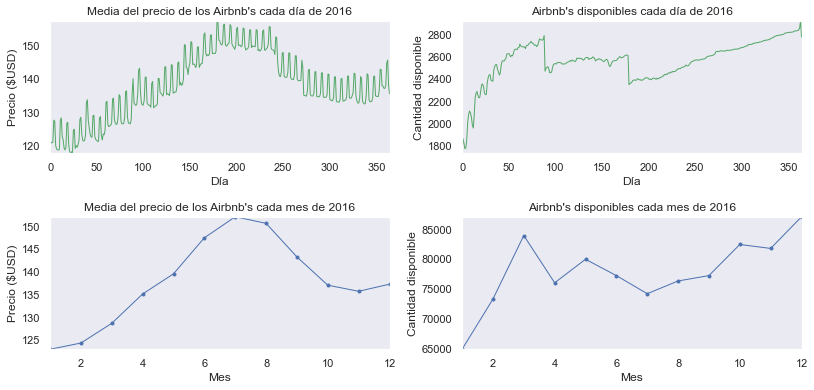

In [911]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,6))
fig.tight_layout(pad=4.0)
axes[0][0].plot(precios_dia["day"], precios_dia["price"], 'g-',linewidth=1)
axes[0][0].grid()
axes[0][0].autoscale(axis='both', tight=True)
axes[0][0].set_title("Media del precio de los Airbnb's cada día de 2016")
axes[0][0].set_ylabel("Precio ($USD)")
axes[0][0].set_xlabel("Día")

axes[1][0].plot(precios_mes.index, precios_mes["price"], 'b.-',linewidth=1)
axes[1][0].grid()
axes[1][0].autoscale(axis='both', tight=True)
axes[1][0].set_title("Media del precio de los Airbnb's cada mes de 2016")
axes[1][0].set_ylabel("Precio ($USD)")
axes[1][0].set_xlabel("Mes")

axes[0][1].plot(disponibilidad["day"], disponibilidad["available"], 'g-',linewidth=1)
axes[0][1].grid()
axes[0][1].autoscale(axis='both', tight=True)
axes[0][1].set_title("Airbnb's disponibles cada día de 2016")
axes[0][1].set_ylabel("Cantidad disponible")
axes[0][1].set_xlabel("Día")

axes[1][1].plot(disponibilidad_mes.index, disponibilidad_mes["available"], 'b.-',linewidth=1)
axes[1][1].grid()
axes[1][1].autoscale(axis='both', tight=True)
axes[1][1].set_title("Airbnb's disponibles cada mes de 2016")
axes[1][1].set_ylabel("Cantidad disponible")
axes[1][1].set_xlabel("Mes")

In [912]:
weekDays = ["Lunes","Martes","Miercoles","Jueves","Viernes","Sabado","Domingo"]
precios_dia["day_week"] = pd.DatetimeIndex(precios_dia.index).dayofweek
precios_dia_semana = precios_dia[["price", "day_week"]].groupby("day_week", as_index=False).mean()
precios_dia_semana['day_week'] = precios_dia_semana['day_week'].replace([0, 1, 2, 3, 4, 5, 6], weekDays)
precios_dia_semana

,day_week,price
0,Lunes,135.637263
1,Martes,135.379666
2,Miercoles,135.407384
3,Jueves,136.382791
4,Viernes,142.964759
5,Sabado,143.120562
6,Domingo,136.463607


Text(0.5, 0, 'Día de la semana')

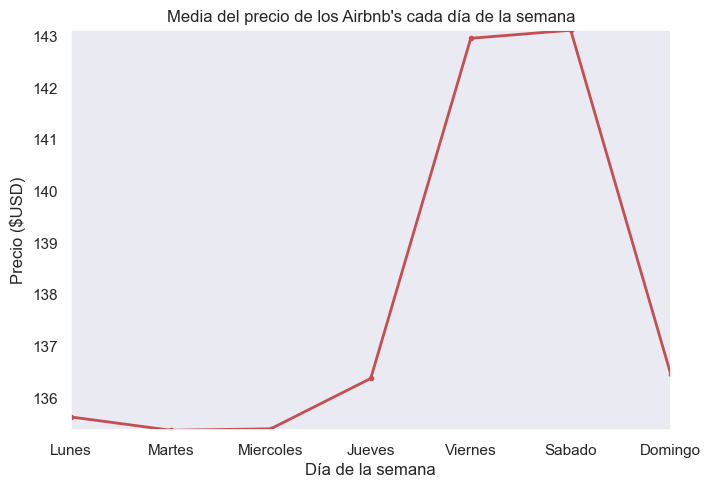

In [913]:
fig = plt.figure(dpi=100)
axes = fig.add_axes([0,0,1,1])
axes.plot( precios_dia_semana["day_week"], precios_dia_semana["price"], 'r.-',linewidth=2)
axes.grid()
axes.autoscale(axis='both', tight=True)
axes.set_title("Media del precio de los Airbnb's cada día de la semana")
axes.set_ylabel("Precio ($USD)")
axes.set_xlabel("Día de la semana")

In [914]:
#Por ultimo miramos cuales fueron los Airbnb's más ocupados a lo largo del año
ocupacion = calendario[["available", "listing_id"]].groupby("listing_id").sum()
day = np.arange(0, 365)
ocupacion.reset_index(inplace=True)
ocupacion.rename(columns={"listing_id": "id"}, inplace = True)
ocupacion

,id,available
0,3335,309
1,4291,365
2,5682,309
3,6606,365
4,7369,53
...,...,...
3813,10332096,365
3814,10334184,361
3815,10339144,0
3816,10339145,365


Text(0.5, 0, 'Días disponibles')

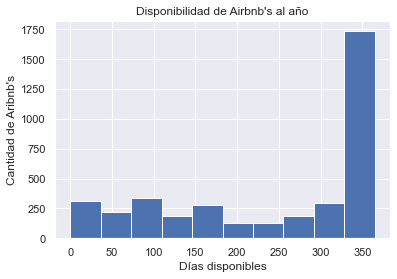

In [915]:
plt.hist(ocupacion["available"]);
plt.title("Disponibilidad de Airbnb's al año")
plt.ylabel("Cantidad de Aribnb's")
plt.xlabel("Días disponibles")

### Concluciones del calendario

1. Se observa que durante los meses de verano la demanda de airbnb's es mucho más alta, algo que es evidente. Sin embargo, se observa que durante la festividades de fin de año del 2016 la demanda minima, algo que no se esperaba pues los viajes son frecuentes en esta epoca.
2. De manera similar, el precio aumenta junto con la demanda, algo que es evidente. Pero tambien se observa que los días Viernes y Sabado se eleva el precio en aproximadamente 8 usd.
3. En el histograma de ocupación se observa que la mayoria de los airbnb's estan disponibles casi todo el año. Con el siguiente dataset se buscará la correlación entre las distintas variables con la disponibilidad del airbnb al año.

In [1002]:
listado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

In [1129]:
# Creamos copia del dataset
listado_copia = listado.copy()
# Eliminamos variables redundantes o inecesarias del dataset
innecesario = ["country","country_code","thumbnail_url","medium_url","picture_url","xl_picture_url","host_url","listing_url",
               "license", "jurisdiction_names", "last_review","first_review","has_availability","description","last_scraped",
               "city","state","market","calendar_last_scraped","neighbourhood_cleansed","calendar_updated","space","summary",
               "name","neighborhood_overview","host_name","host_location","host_about","host_response_time","zipcode",
               "host_response_rate","host_acceptance_rate","host_thumbnail_url","host_picture_url","host_neighbourhood",
               "host_listings_count","host_total_listings_count","host_verifications","host_has_profile_pic","host_identity_verified",
               "street", "host_since", "host_is_superhost", "neighbourhood_group_cleansed", "smart_location","amenities",
               "calculated_host_listings_count","require_guest_phone_verification","require_guest_profile_picture","review_scores_communication",
               "review_scores_checkin","review_scores_cleanliness","review_scores_accuracy","number_of_reviews","availability_30",
               "availability_60","availability_90","availability_365", "requires_license", "reviews_per_month","instant_bookable",
               "review_scores_value","weekly_price","monthly_price","transit","notes","square_feet","cleaning_fee",
               "security_deposit","experiences_offered","scrape_id","maximum_nights","review_scores_rating", "host_id"]
for i in range(len(innecesario)):
    listado_copia.pop(innecesario[i])

listado_copia = pd.merge(listado_copia,ocupacion,on='id')
listado_copia["price"] = listado_copia["price"].str.replace("$","")
listado_copia["price"] = listado_copia["price"].str.replace(",","")
listado_copia["price"] = pd.to_numeric(listado_copia["price"])
listado_copia.head()

,id,neighbourhood,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,guests_included,extra_people,minimum_nights,review_scores_location,cancellation_policy,available
0,241032,Queen Anne,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,85.0,2,$5.00,1,9.0,moderate,346
1,953595,Queen Anne,47.639123,-122.365666,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,150.0,1,$0.00,2,10.0,strict,291
2,3308979,Queen Anne,47.629724,-122.369483,t,House,Entire home/apt,11,4.5,5.0,7.0,Real Bed,975.0,10,$25.00,4,10.0,strict,220
3,7421966,Queen Anne,47.638473,-122.369279,t,Apartment,Entire home/apt,3,1.0,0.0,2.0,Real Bed,100.0,1,$0.00,1,NaN,flexible,143
4,278830,Queen Anne,47.632918,-122.372471,t,House,Entire home/apt,6,2.0,3.0,3.0,Real Bed,450.0,6,$15.00,1,9.0,strict,365


In [1004]:
true_location = listado_copia[listado_copia["is_location_exact"]=="t"].dropna()

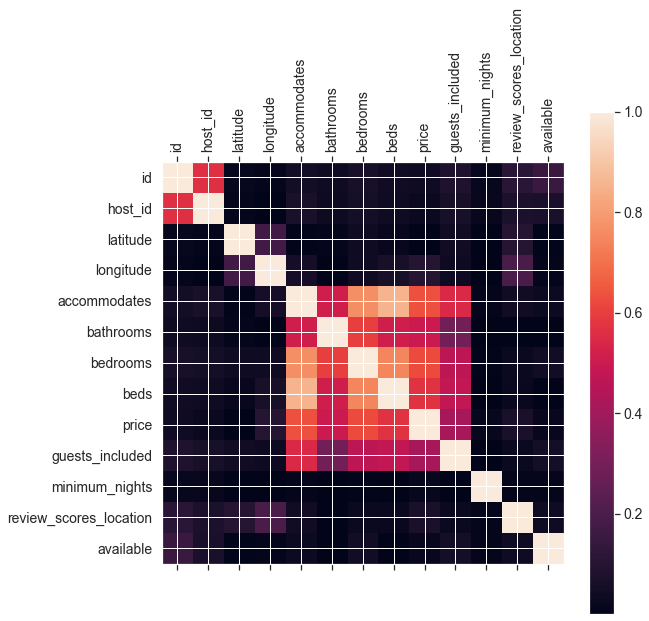

In [1005]:
plt.matshow(abs(true_location.corr()))
plt.xticks(range(true_location.select_dtypes(['number']).shape[1]), true_location.select_dtypes(['number']).columns, fontsize=14, rotation=90)
plt.yticks(range(true_location.select_dtypes(['number']).shape[1]), true_location.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)

In [1006]:
true_location.plot.scatter("longitude", "latitude", s=1, c="available")

In [1007]:
seattle_coords = (47.608013, -122.335167)
cluster_destino = folium.Map(location = seattle_coords,
                            zoom_start = 11,
                            control_scale = True
                            )

# Creamos tuplas con los valores de coordenadas.
destino_coords = true_location[['latitude', 'longitude']].values

# Utilizamos los datos de origen para generar clusters dispuestos por la ciudad
FastMarkerCluster(name ="available" ,
                  data= destino_coords).add_to(cluster_destino)

cluster_destino

In [1008]:
norte = true_location[(true_location["latitude"]>47.65)]
norte.plot.scatter("longitude", "latitude", s=1, c="available")

In [1009]:
min_dias=365*0.2

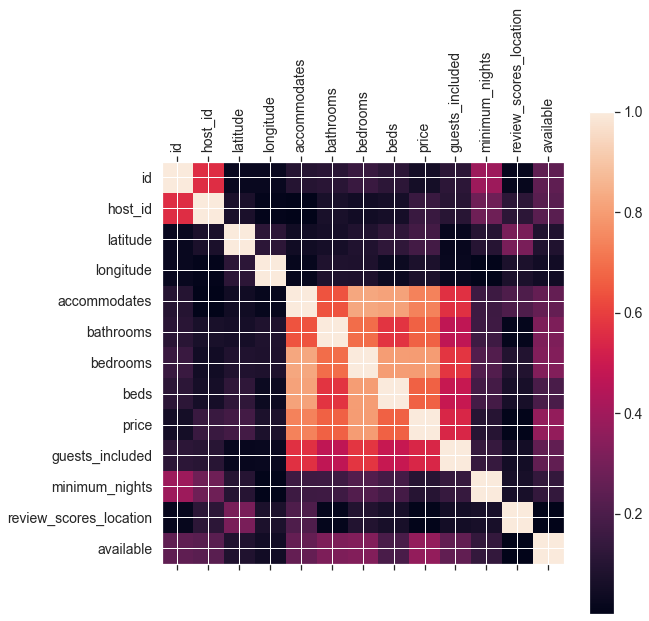

In [1010]:
norte = norte[norte["available"]<=min_dias]
plt.matshow(abs(norte.corr()))
plt.xticks(range(norte.select_dtypes(['number']).shape[1]), norte.select_dtypes(['number']).columns, fontsize=14, rotation=90)
plt.yticks(range(norte.select_dtypes(['number']).shape[1]), norte.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)

In [1011]:
sur = true_location[((true_location["latitude"]<47.60)&(true_location["longitude"]<-122.34))]
sur.plot.scatter("longitude", "latitude", s=1, c="available")

In [1012]:
sur = sur[sur["available"]<=min_dias]
abs(sur.corr())

,id,host_id,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,guests_included,minimum_nights,review_scores_location,available
id,1.000000,0.634399,0.157159,0.078748,0.091199,0.076881,0.017311,0.068822,0.108921,0.000619,0.420514,0.001174,0.160685
host_id,0.634399,1.000000,0.060609,0.044240,0.077679,0.061746,0.102981,0.016868,0.032749,0.058732,0.280400,0.238336,0.498581
latitude,0.157159,0.060609,1.000000,0.100853,0.384820,0.293034,0.382649,0.309247,0.229997,0.317826,0.276883,0.120088,0.282796
longitude,0.078748,0.044240,0.100853,1.000000,0.087506,0.063099,0.089131,0.057672,0.185984,0.039715,0.032840,0.450608,0.292937
accommodates,0.091199,0.077679,0.384820,0.087506,1.000000,0.733465,0.882862,0.959392,0.736635,0.772154,0.498863,0.165896,0.422464
bathrooms,0.076881,0.061746,0.293034,0.063099,0.733465,1.000000,0.849597,0.758155,0.863671,0.680567,0.483243,0.160701,0.290059
bedrooms,0.017311,0.102981,0.382649,0.089131,0.882862,0.849597,1.000000,0.858082,0.798758,0.670881,0.564150,0.116621,0.428312
beds,0.068822,0.016868,0.309247,0.057672,0.959392,0.758155,0.858082,1.000000,0.713208,0.703955,0.487250,0.205900,0.339122
price,0.108921,0.032749,0.229997,0.185984,0.736635,0.863671,0.798758,0.713208,1.000000,0.625387,0.451910,0.304266,0.447183
guests_included,0.000619,0.058732,0.317826,0.039715,0.772154,0.680567,0.670881,0.703955,0.625387,1.000000,0.571809,0.313975,0.292934


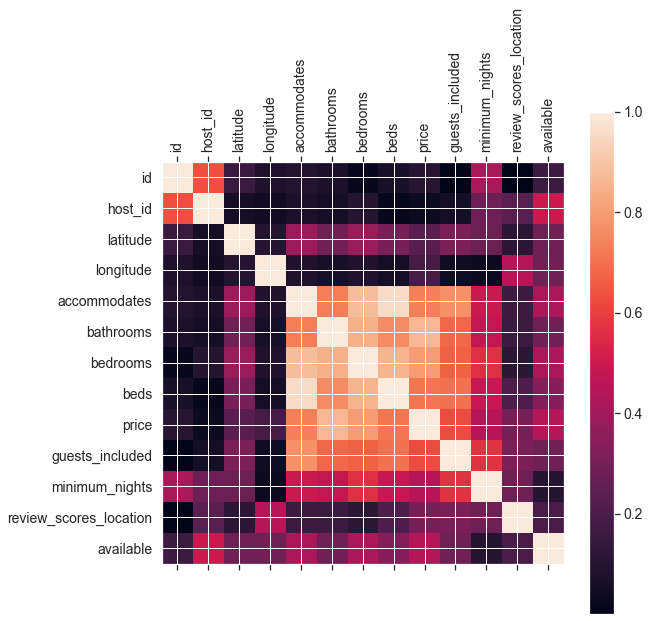

In [1013]:
plt.matshow(abs(sur.corr()))
plt.xticks(range(sur.select_dtypes(['number']).shape[1]), sur.select_dtypes(['number']).columns, fontsize=14, rotation=90)
plt.yticks(range(sur.select_dtypes(['number']).shape[1]), sur.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)

In [1014]:
centro = true_location[(true_location["latitude"]>47.61)|(true_location["longitude"]>-122.34)]
centro = centro[(centro["latitude"]<47.65)]
centro.plot.scatter("longitude", "latitude", s=1, c="available")

In [1015]:
abs(centro.corr())

,id,host_id,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,guests_included,minimum_nights,review_scores_location,available
id,1.000000,0.566392,0.024353,0.022658,0.090785,0.070620,0.100505,0.089116,0.056835,0.052746,0.021015,0.122488,0.168241
host_id,0.566392,1.000000,0.018523,0.004020,0.084356,0.054057,0.087593,0.075628,0.047269,0.038108,0.026970,0.054845,0.092373
latitude,0.024353,0.018523,1.000000,0.656845,0.023190,0.040560,0.013364,0.024602,0.206466,0.045046,0.009912,0.372491,0.036935
longitude,0.022658,0.004020,0.656845,1.000000,0.065343,0.014748,0.023716,0.035128,0.213582,0.007984,0.004226,0.265762,0.019887
accommodates,0.090785,0.084356,0.023190,0.065343,1.000000,0.522335,0.757385,0.869793,0.628329,0.538491,0.014509,0.061203,0.003618
bathrooms,0.070620,0.054057,0.040560,0.014748,0.522335,1.000000,0.628115,0.530100,0.493031,0.319866,0.003801,0.020441,0.027922
bedrooms,0.100505,0.087593,0.013364,0.023716,0.757385,0.628115,1.000000,0.761708,0.603844,0.480428,0.001693,0.062075,0.001745
beds,0.089116,0.075628,0.024602,0.035128,0.869793,0.530100,0.761708,1.000000,0.579717,0.494883,0.009007,0.051220,0.023355
price,0.056835,0.047269,0.206466,0.213582,0.628329,0.493031,0.603844,0.579717,1.000000,0.434302,0.014059,0.090947,0.007081
guests_included,0.052746,0.038108,0.045046,0.007984,0.538491,0.319866,0.480428,0.494883,0.434302,1.000000,0.009780,0.038668,0.042943


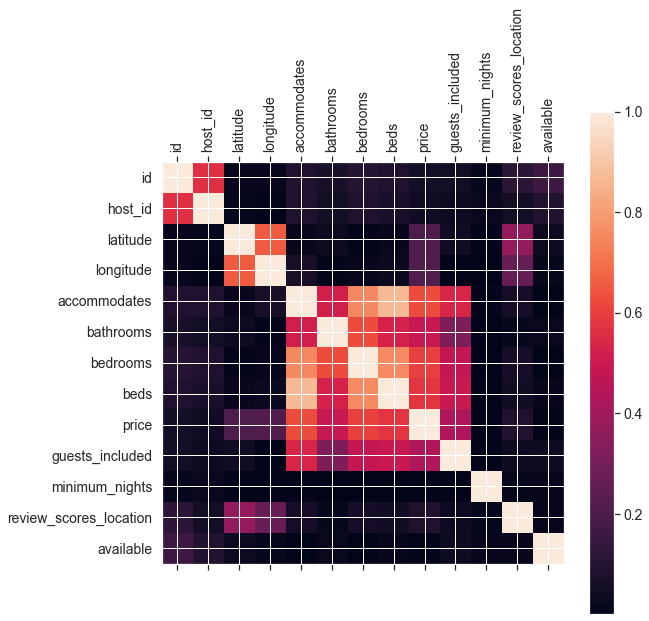

In [1016]:
plt.matshow(abs(centro.corr()))
plt.xticks(range(centro.select_dtypes(['number']).shape[1]), centro.select_dtypes(['number']).columns, fontsize=14, rotation=90)
plt.yticks(range(centro.select_dtypes(['number']).shape[1]), centro.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)

Dado que se busca una locación que cumpla con que la mayoría del año este ocupado, se filtran las posiciones de acuerdo a que la disponibilidad sea menor al 20%, es decir, que este ocupado el 80% del año.

In [1017]:
columnas = centro.select_dtypes(['number'])
print("Norte")
for i in columnas:
    if relación_alta_significativa(i, 'available', df=norte[norte["available"]<=min_dias])[0] == True:
        print(i)

print("Centro")
for i in columnas:
    if relación_alta_significativa(i, 'available', df=centro[centro["available"]<=min_dias])[0] == True:
        print(i)

print("Sur")
for i in columnas:
    if relación_alta_significativa(i, 'available', df=sur[sur["available"]<=min_dias])[0] == True:
        print(i)

Norte
available
Centro
available
Sur
available


In [1018]:
ocupacion_minima = true_location[true_location["available"]<=min_dias]
ocupacion_minima.head()

,id,host_id,neighbourhood,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,guests_included,extra_people,minimum_nights,review_scores_location,cancellation_policy,available
22,8942678,46675077,Queen Anne,47.635632,-122.358881,t,House,Entire home/apt,8,2.0,4.0,4.0,Real Bed,450.0,1,$0.00,4,10.0,flexible,53
33,5021081,25906186,Queen Anne,47.638121,-122.375790,t,House,Entire home/apt,7,3.5,4.0,3.0,Real Bed,222.0,7,$75.00,2,9.0,strict,2
94,6590264,24500821,Ballard,47.669874,-122.387717,t,Apartment,Entire home/apt,4,1.0,1.0,2.0,Real Bed,115.0,2,$50.00,1,9.0,strict,56
113,7134759,23228606,Ballard,47.668961,-122.393877,t,Townhouse,Private room,2,1.0,1.0,1.0,Real Bed,60.0,1,$0.00,1,10.0,moderate,47
119,1609922,3494510,Ballard,47.671666,-122.377912,t,House,Entire home/apt,5,1.5,2.0,2.0,Real Bed,150.0,2,$10.00,4,10.0,moderate,16


In [1019]:
cluster_destino = folium.Map(location = seattle_coords,
                            zoom_start = 11,
                            control_scale = True
                            )

# Creamos tuplas con los valores de coordenadas.
destino_coords = ocupacion_minima[['latitude', 'longitude']].values

# Utilizamos los datos de origen para generar clusters dispuestos por la ciudad
FastMarkerCluster(name ="available" ,
                  data= destino_coords).add_to(cluster_destino)

cluster_destino

In [1020]:
ocupacion_minima = ocupacion_minima[(ocupacion_minima["property_type"]!="Loft")&
                                   (ocupacion_minima["property_type"]!="Bed & Breakfast")&
                                   (ocupacion_minima["property_type"]!="Treehouse")&
                                   (ocupacion_minima["property_type"]!="Camper/RV")&
                                   (ocupacion_minima["property_type"]!="Cabin")]

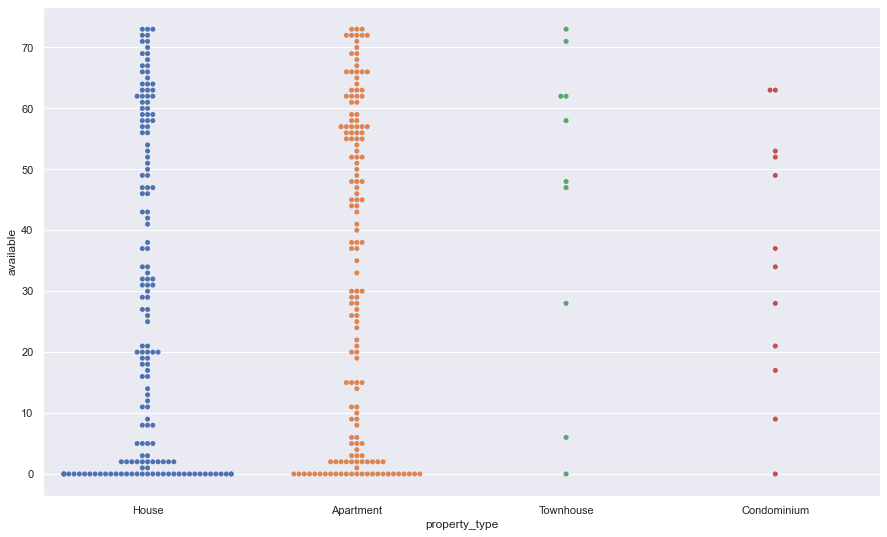

In [1021]:
sns.set(rc={'figure.figsize':(15,9)})
sns.swarmplot(x="property_type", y="available", data=ocupacion_minima, size=5)

In [1022]:
porcentajes = ((100*ocupacion_minima["property_type"].value_counts())/true_location["property_type"].value_counts()).dropna()
porcentajes

Apartment      12.106538
Condominium    19.047619
House          11.769231
Townhouse      14.084507
Name: property_type, dtype: float64

In [1023]:
total = (porcentajes/100 * true_location["property_type"].value_counts()).dropna()
total

Apartment      150.0
Condominium     12.0
House          153.0
Townhouse       10.0
Name: property_type, dtype: float64

In [1024]:
ocupacion_minima.pivot_table(
      index = 'bathrooms', 
      columns = ["property_type", 'bedrooms'],
      margins = True,
      aggfunc = np.mean,
      values = 'available'
)

property_type  Apartment                                  Condominium  \
bedrooms             0.0        1.0        2.0   3.0  4.0         1.0   
bathrooms                                                               
1.0            37.878788  32.265957  18.700000  63.0  0.0   36.555556   
1.5                  NaN  53.000000  11.000000   NaN  NaN         NaN   
2.0                  NaN        NaN  31.625000   NaN  NaN         NaN   
2.5                  NaN        NaN        NaN   NaN  NaN         NaN   
3.0                  NaN        NaN        NaN   NaN  NaN         NaN   
3.5                  NaN        NaN        NaN   NaN  NaN         NaN   
All            37.878788  32.484211  23.736842  63.0  0.0   36.555556   

property_type            House                                                \
bedrooms             2.0   0.0    1.0        2.0        3.0        4.0   5.0   
bathrooms                                                                      
1.0            48.500000  29.6  36.90  31.705882   0.000000        NaN   NaN   
1.5             0.000000   NaN  30.00  28.000000   0.000000        NaN   NaN   
2.0                  NaN   NaN  16.50  25.125000  15.588235  31.333333   NaN   
2.5                  NaN   NaN    NaN  31.500000  31.000000   0.000000   NaN   
3.0                  NaN   NaN    NaN        NaN  15.500000   0.000000   NaN   
3.5                  NaN   NaN    NaN        NaN        NaN  29.400000  36.0   
All            32.333333  29.6  34.25  29.516129  16.066667  18.538462  36.0   

property_type Townhouse                   All  
bedrooms            1.0   2.0  3.0             
bathrooms                                      
1.0               63.25   NaN  NaN  34.209205  
1.5                 NaN  53.0  6.0  25.500000  
2.0                 NaN  31.0  NaN  21.891304  
2.5                 NaN  28.0  NaN  24.600000  
3.0                 NaN   NaN  NaN   8.857143  
3.5                 NaN   NaN  NaN  31.285714  
All               63.25  39.2  6.0  31.132308

In [1026]:
ocupacion_minima.pivot_table(
      index = 'bathrooms', 
      columns = ["property_type", 'bedrooms', "room_type"],
      margins = True,
      aggfunc = lambda x: len(x.unique()),
      values = 'available'
)

property_type       Apartment                                           \
bedrooms                  0.0             1.0                            
room_type     Entire home/apt Entire home/apt Private room Shared room   
bathrooms                                                                
1.0                      25.0            36.0         14.0         6.0   
1.5                       NaN             NaN          1.0         NaN   
2.0                       NaN             NaN          NaN         NaN   
2.5                       NaN             NaN          NaN         NaN   
3.0                       NaN             NaN          NaN         NaN   
3.5                       NaN             NaN          NaN         NaN   
All                      25.0            36.0         15.0         6.0   

property_type                                                     Condominium  \
bedrooms                  2.0             3.0             4.0             1.0   
room_type     Entire home/apt Entire home/apt Entire home/apt Entire home/apt   
bathrooms                                                                       
1.0                       6.0             2.0             1.0             9.0   
1.5                       1.0             NaN             NaN             NaN   
2.0                       8.0             NaN             NaN             NaN   
2.5                       NaN             NaN             NaN             NaN   
3.0                       NaN             NaN             NaN             NaN   
3.5                       NaN             NaN             NaN             NaN   
All                      12.0             2.0             1.0             9.0   

property_type                           House                               \
bedrooms                  2.0             0.0             1.0                
room_type     Entire home/apt Entire home/apt Entire home/apt Private room   
bathrooms                                                                    
1.0                       2.0             5.0             6.0         33.0   
1.5                       1.0             NaN             1.0          3.0   
2.0                       NaN             NaN             NaN          3.0   
2.5                       NaN             NaN             NaN          NaN   
3.0                       NaN             NaN             NaN          NaN   
3.5                       NaN             NaN             NaN          NaN   
All                       3.0             5.0             6.0         37.0   

property_type                                                                  \
bedrooms                  2.0             3.0             4.0             5.0   
room_type     Entire home/apt Entire home/apt Entire home/apt Entire home/apt   
bathrooms                                                                       
1.0                      13.0             1.0             NaN             NaN   
1.5                       4.0             1.0             NaN             NaN   
2.0                       7.0            13.0             3.0             NaN   
2.5                       2.0             5.0             1.0             NaN   
3.0                       NaN             2.0             1.0             NaN   
3.5                       NaN             NaN             5.0             2.0   
All                      24.0            16.0             8.0             2.0   

property_type    Townhouse                                 All  
bedrooms               1.0             2.0             3.0      
room_type     Private room Entire home/apt Entire home/apt      
bathrooms                                                       
1.0                    4.0             NaN             NaN  69  
1.5                    NaN             2.0             1.0  13  
2.0                    NaN             2.0             NaN  25  
2.5                    NaN             1.0             NaN   7  
3.0                   

In [1089]:
estructuras_eleccion = ocupacion_minima[(ocupacion_minima["property_type"]=="Apartment")|(ocupacion_minima["property_type"]=="House")]

In [1099]:
barrios_1 = estructuras_eleccion.pivot_table(
      index = 'neighbourhood', 
      columns = "property_type",
      aggfunc = np.mean,
      values = 'available'
)

In [1100]:
barrios_2 = estructuras_eleccion.pivot_table(
      index = 'neighbourhood', 
      columns = "property_type",
      aggfunc = lambda x: len(x.unique()),
      values = 'available'
)

In [1106]:
pd.merge(barrios_1, barrios_2, how="inner", on=barrios_1.index, suffixes=('_promedio', '_cantidad')).reindex(columns=["Apartment_promedio", "Apartment_cantidad", "House_promedio", "House_cantidad"]).set_index(barrios_1.index)

property_type,Apartment_promedio,Apartment_cantidad,House_promedio,House_cantidad
neighbourhood,,,,
Alki,0.000000,1.0,66.000000,1.0
Atlantic,17.000000,3.0,50.000000,3.0
Ballard,45.000000,3.0,20.000000,8.0
Belltown,40.058824,14.0,NaN,NaN
Bitter Lake,NaN,NaN,32.666667,2.0
Broadview,66.000000,1.0,37.000000,2.0
Broadway,58.000000,1.0,63.000000,1.0
Bryant,NaN,NaN,0.500000,2.0
Capitol Hill,26.268293,24.0,20.357143,8.0


In [1097]:
cluster_destino = folium.Map(location = seattle_coords,
                            zoom_start = 12,
                            control_scale = True
                            )

# Creamos tuplas con los valores de coordenadas.
destino_coords = estructuras_eleccion[['latitude', 'longitude']].values

# Utilizamos los datos de origen para generar clusters dispuestos por la ciudad
FastMarkerCluster(name ="available" ,
                  data= destino_coords).add_to(cluster_destino)

cluster_destino

In [1098]:

cluster_destino = folium.Map(location = seattle_coords,
                            zoom_start = 12,
                            control_scale = True
                            )

# Creamos tuplas con los valores de coordenadas.
destino_coords = estructuras_eleccion[estructuras_eleccion["property_type"]=="House"][['latitude', 'longitude']].values

# Utilizamos los datos de origen para generar clusters dispuestos por la ciudad
FastMarkerCluster(name ="available" ,
                  data= destino_coords).add_to(cluster_destino)

cluster_destino


In [1079]:
cluster_destino = folium.Map(location = seattle_coords,
                            zoom_start = 12,
                            control_scale = True
                            )

# Creamos tuplas con los valores de coordenadas.
destino_coords = ocupacion_minima[['latitude', 'longitude']].values

# Utilizamos los datos de origen para generar clusters dispuestos por la ciudad
FastMarkerCluster(name ="available" ,
                  data= destino_coords).add_to(cluster_destino)

cluster_destino

## Precio

In [1108]:
calendario.head()

,listing_id,date,available,price,month
0,241032,2016-01-04,1,85.0,1
1,241032,2016-01-05,1,85.0,1
2,241032,2016-01-06,0,NaN,1
3,241032,2016-01-07,0,NaN,1
4,241032,2016-01-08,0,NaN,1


In [1109]:
calendario_precio = listado_copia.copy()
calendario_precio = estructuras_eleccion.drop(columns=["price", "available", "is_location_exact"])
calendario = calendario.rename({'listing_id': 'id'}, axis=1)
calendario.head()

,id,date,available,price,month
0,241032,2016-01-04,1,85.0,1
1,241032,2016-01-05,1,85.0,1
2,241032,2016-01-06,0,NaN,1
3,241032,2016-01-07,0,NaN,1
4,241032,2016-01-08,0,NaN,1


In [1110]:
calendario_precio.head()

,id,host_id,neighbourhood,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,guests_included,extra_people,minimum_nights,review_scores_location,cancellation_policy
22,8942678,46675077,Queen Anne,47.635632,-122.358881,House,Entire home/apt,8,2.0,4.0,4.0,Real Bed,1,$0.00,4,10.0,flexible
33,5021081,25906186,Queen Anne,47.638121,-122.375790,House,Entire home/apt,7,3.5,4.0,3.0,Real Bed,7,$75.00,2,9.0,strict
94,6590264,24500821,Ballard,47.669874,-122.387717,Apartment,Entire home/apt,4,1.0,1.0,2.0,Real Bed,2,$50.00,1,9.0,strict
119,1609922,3494510,Ballard,47.671666,-122.377912,House,Entire home/apt,5,1.5,2.0,2.0,Real Bed,2,$10.00,4,10.0,moderate
123,6423204,33367198,Ballard,47.671560,-122.382704,House,Entire home/apt,3,1.0,2.0,2.0,Real Bed,2,$10.00,3,9.0,strict


In [1111]:
calendario_precio =  pd.merge(calendario_precio, calendario, how="inner", on=["id"])
calendario_precio = calendario_precio.dropna()
calendario_precio = calendario_precio.drop(columns="available")
calendario_precio["day_week"] = pd.DatetimeIndex(calendario_precio["date"]).dayofweek
calendario_precio.head()

,id,host_id,neighbourhood,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,...,bed_type,guests_included,extra_people,minimum_nights,review_scores_location,cancellation_policy,date,price,month,day_week
312,8942678,46675077,Queen Anne,47.635632,-122.358881,House,Entire home/apt,8,2.0,4.0,...,Real Bed,1,$0.00,4,10.0,flexible,2016-11-11,450.0,11,4
313,8942678,46675077,Queen Anne,47.635632,-122.358881,House,Entire home/apt,8,2.0,4.0,...,Real Bed,1,$0.00,4,10.0,flexible,2016-11-12,450.0,11,5
314,8942678,46675077,Queen Anne,47.635632,-122.358881,House,Entire home/apt,8,2.0,4.0,...,Real Bed,1,$0.00,4,10.0,flexible,2016-11-13,450.0,11,6
315,8942678,46675077,Queen Anne,47.635632,-122.358881,House,Entire home/apt,8,2.0,4.0,...,Real Bed,1,$0.00,4,10.0,flexible,2016-11-14,450.0,11,0
316,8942678,46675077,Queen Anne,47.635632,-122.358881,House,Entire home/apt,8,2.0,4.0,...,Real Bed,1,$0.00,4,10.0,flexible,2016-11-15,450.0,11,1


In [1112]:
otras_estrucutras = ["Bungalow", "Boat", "Tent", "Camper/RV", "Loft", "Other", "Dorm", "Bed & Breakfast", "Chalet", "Treehouse", "Cabin"]
for i in otras_estrucutras:
    calendario_precio = calendario_precio[calendario_precio["property_type"]!=i]

In [1113]:
fig = px.box(calendario_precio[calendario_precio["date"]=="2016-07-23"], y="price", color="property_type")
fig.show()

In [1114]:
calendario_precio[calendario_precio["property_type"]=="Apartment"] = calendario_precio[(calendario_precio["property_type"]=="Apartment")&(calendario_precio["price"]<=339)]
calendario_precio[calendario_precio["property_type"]=="House"] = calendario_precio[(calendario_precio["property_type"]=="House")&(calendario_precio["price"]<=330)]
calendario_precio[calendario_precio["property_type"]=="Townhouse"] = calendario_precio[(calendario_precio["property_type"]=="Townhouse")&(calendario_precio["price"]<=300)]
calendario_precio[calendario_precio["property_type"]=="Condominium"] = calendario_precio[(calendario_precio["property_type"]=="Condominium")&(calendario_precio["price"]<=350)]
calendario_precio = calendario_precio[calendario_precio["price"]!=10]
calendario_precio = calendario_precio[calendario_precio["bathrooms"]!=5]
calendario_precio = calendario_precio[calendario_precio["accommodates"]!=16]
calendario_precio.head()

,id,host_id,neighbourhood,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,...,bed_type,guests_included,extra_people,minimum_nights,review_scores_location,cancellation_policy,date,price,month,day_week
312,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
313,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
314,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
316,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1115]:
fig = px.box(calendario_precio[calendario_precio["date"]=="2016-07-23"], y="price", color="property_type")
fig.show()

In [1116]:
calendario_precio["room_type"].unique()

array([nan, 'Entire home/apt', 'Private room', 'Shared room'],
      dtype=object)

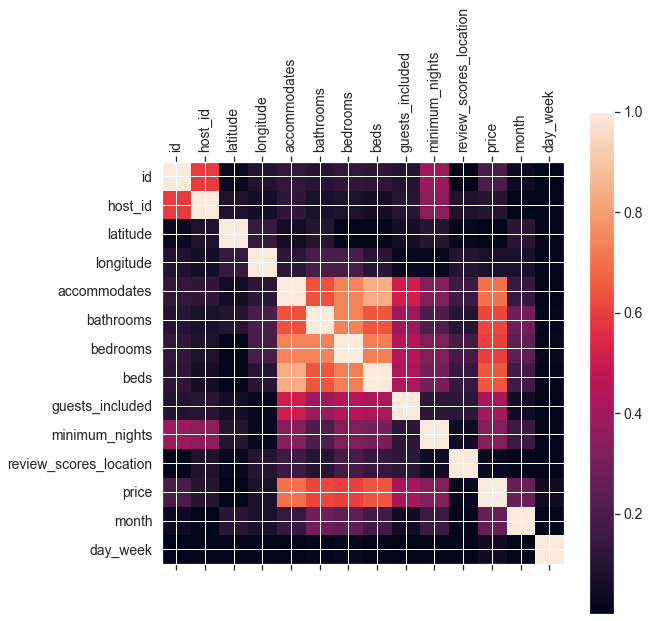

In [1117]:
plt.matshow(abs(calendario_precio.corr()))
plt.xticks(range(calendario_precio.select_dtypes(['number']).shape[1]), calendario_precio.select_dtypes(['number']).columns, fontsize=14, rotation=90)
plt.yticks(range(calendario_precio.select_dtypes(['number']).shape[1]), calendario_precio.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)

In [1130]:
fechas = calendario_precio["date"].dropna().unique()
dates_regresion = pd.DataFrame(columns=["date", "rsquared", "resultado"])
txt_params = ["Capitol Hill",
         "Apartment",
         "Entire home/apt",
         "Real Bed"]
num_params = [round(listado_copia["accommodates"].mean()),
                  round(listado_copia["bathrooms"].mean()),
                  round(listado_copia["bedrooms"].mean()),
                  round(listado_copia["beds"].mean()),
              round(listado_copia["guests_included"].mean())]#accommodates, bathrooms, bedrooms, beds, guests_included
for i in calendario_precio["date"].dropna().unique():
    model = sm.OLS.from_formula("price ~ accommodates + bathrooms + bedrooms + beds + room_type + property_type + neighbourhood + bed_type + guests_included",
                                data=calendario_precio[calendario_precio["date"]==i])
    result = model.fit()
    
    parametros = pd.DataFrame(result.params)
    

    parametros["params"] = 0
    for k in txt_params:
        for j in parametros.index.to_list():
            if k in j:
                parametros.loc[j, "params"]=1 

    parametros.loc["Intercept", "params"] = 1
    parametros.loc["accommodates", "params"] = num_params[0]
    parametros.loc["bathrooms", "params"] = num_params[1]
    parametros.loc["bedrooms", "params"] = num_params[2]
    parametros.loc["beds", "params"] = num_params[3]
    parametros.loc["guests_included", "params"] = num_params[4]
    dates_regresion = dates_regresion.append({'date': i, "rsquared":result.rsquared, "resultado":(parametros[0]*parametros["params"]).sum()}, ignore_index=True)

C:\Users\Camilo\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1685: RuntimeWarning:

divide by zero encountered in double_scalars



In [1131]:
fig = dates_regresion.plot("date","resultado")
fig.show()

In [34]:
def relación_alta_significativa(var_a, var_b, df, min_mag = 0.5, confianza = 0.95):
    corr, pvalor = stats.pearsonr(df[var_a], df[var_b])
    es_alta_significativa = abs(corr)>=min_mag and pvalor<=1-confianza
    return es_alta_significativa, abs(corr), pvalor

In [49]:
def correlacion_pearson_con_significancia(x, y, df, alfa=0.05):
    coef, p = stats.pearsonr(df[x], df[y])
    if p > alfa:
        return False, abs(p)
    else:
        return True, abs(p)

In [51]:
def correlacion_spearmanr_con_significancia(a, b, df):
    coef, p = stats.spearmanr(df[a], df[b])
    if p > 0.05:
        return False, abs(p)
    else:
        return True, abs(p)

In [53]:
def correlacion_kendal_con_significancia(a, b, df):
    coef, p = stats.kendalltau(df[a], df[b])
    if p > 0.05/2.0:
          return False, abs(p)
    else:
          return True, abs(p)